In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load dataset
df = pd.read_csv(r"C:\Users\biswa\Downloads\healthcare-dataset-stroke-data (1).csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


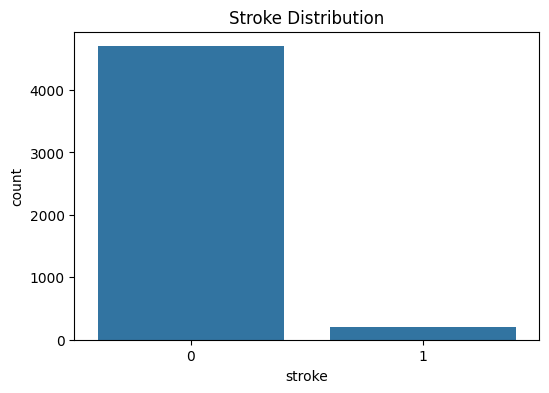

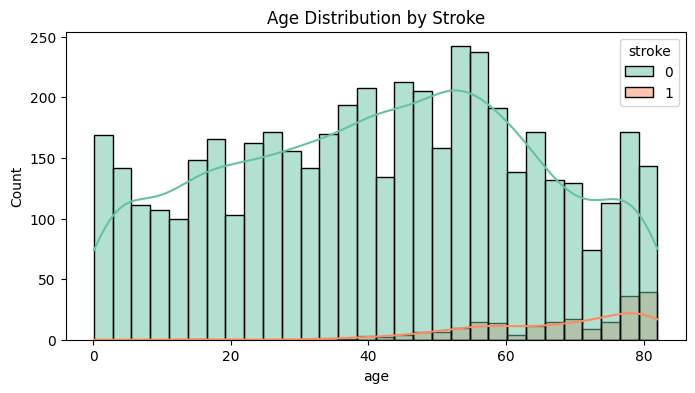

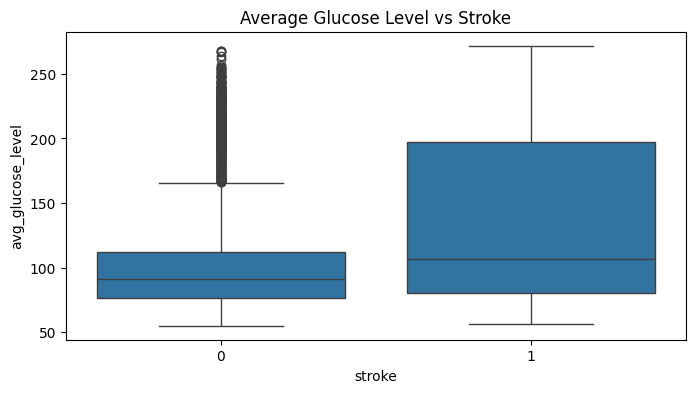

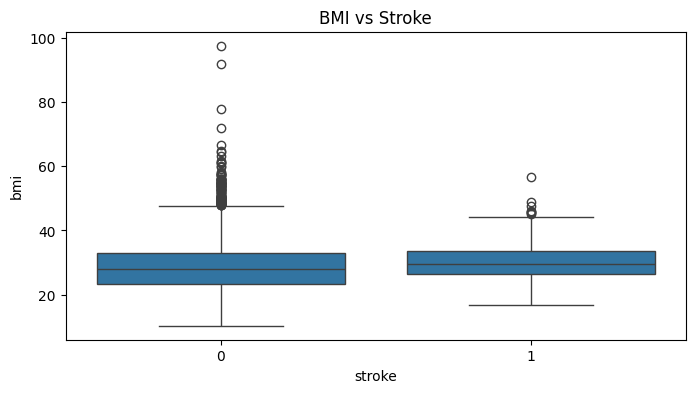

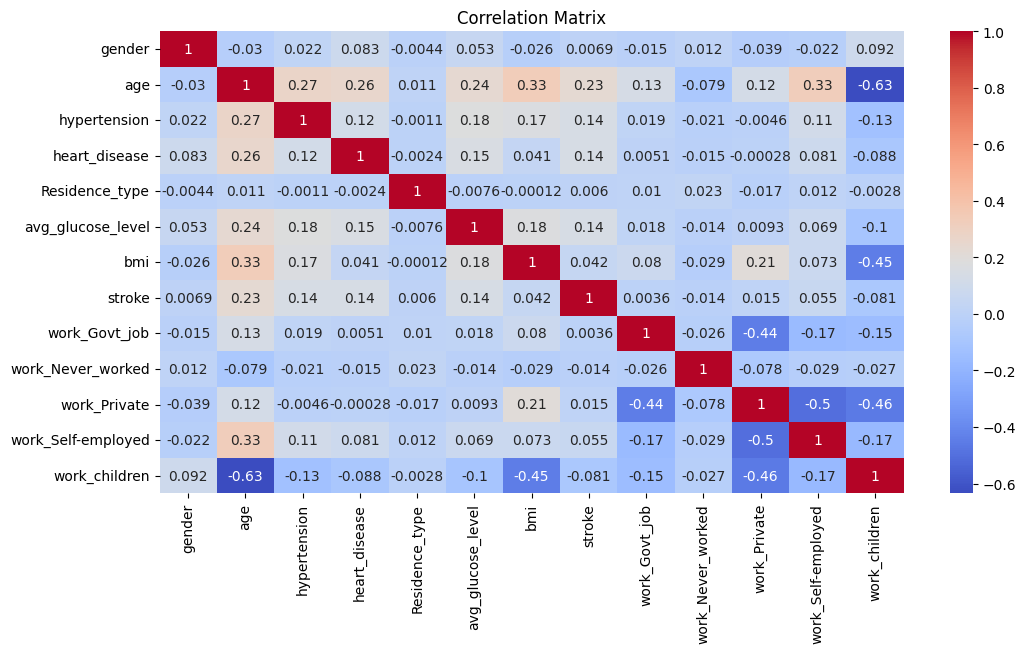

In [8]:
# -----------------------------
# Data Cleaning and Preprocessing
# -----------------------------

# Replace 'N/A' with np.nan
df.replace("N/A", np.nan, inplace=True)

# Convert bmi to float
df['bmi'] = df['bmi'].astype(float)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode 'gender': Male = 1, Female = 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Encode 'Residence_type': Urban = 1, Rural = 0
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

# Drop 'ever_married' column
df.drop(columns=['ever_married'], inplace=True)

# One-hot encode 'work_type'
df = pd.get_dummies(df, columns=['work_type'], prefix='work')

# --- EDA Section ---

# Plot distribution of stroke
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='stroke')
plt.title("Stroke Distribution")
plt.show()

# Age distribution by stroke
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True, palette='Set2')
plt.title("Age Distribution by Stroke")
plt.show()

# Glucose level vs Stroke
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title("Average Glucose Level vs Stroke")
plt.show()

# BMI distribution by stroke
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='bmi')
plt.title("BMI vs Stroke")
plt.show()

# Correlation matrix (excluding non-numeric columns)
numeric_df = df.drop(columns=['id', 'smoking_status'])  # keep stroke
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
df


,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,9046,1.0,67.0,0,1,1,228.69,36.6,formerly smoked,1,False,False,True,False,False
2,31112,1.0,80.0,0,1,0,105.92,32.5,never smoked,1,False,False,True,False,False
3,60182,0.0,49.0,0,0,1,171.23,34.4,smokes,1,False,False,True,False,False
4,1665,0.0,79.0,1,0,0,174.12,24.0,never smoked,1,False,False,False,True,False
5,56669,1.0,81.0,0,0,1,186.21,29.0,formerly smoked,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0.0,13.0,0,0,0,103.08,18.6,Unknown,0,False,False,False,False,True
5106,44873,0.0,81.0,0,0,1,125.20,40.0,never smoked,0,False,False,False,True,False
5107,19723,0.0,35.0,0,0,0,82.99,30.6,never smoked,0,False,False,False,True,False
5108,37544,1.0,51.0,0,0,0,166.29,25.6,formerly smoked,0,False,False,True,False,False


In [10]:
# Convert all boolean values in the DataFrame to integers
df = df.applymap(lambda x: int(x) if type(x) == bool else x)


C:\Users\biswa\AppData\Local\Temp\ipykernel_16636\2281952363.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if type(x) == bool else x)


In [11]:
df

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,9046,1.0,67.0,0,1,1,228.69,36.6,formerly smoked,1,0,0,1,0,0
2,31112,1.0,80.0,0,1,0,105.92,32.5,never smoked,1,0,0,1,0,0
3,60182,0.0,49.0,0,0,1,171.23,34.4,smokes,1,0,0,1,0,0
4,1665,0.0,79.0,1,0,0,174.12,24.0,never smoked,1,0,0,0,1,0
5,56669,1.0,81.0,0,0,1,186.21,29.0,formerly smoked,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0.0,13.0,0,0,0,103.08,18.6,Unknown,0,0,0,0,0,1
5106,44873,0.0,81.0,0,0,1,125.20,40.0,never smoked,0,0,0,0,1,0
5107,19723,0.0,35.0,0,0,0,82.99,30.6,never smoked,0,0,0,0,1,0
5108,37544,1.0,51.0,0,0,0,166.29,25.6,formerly smoked,0,0,0,1,0,0


In [12]:
# One-hot encode 'smoking_status'
df = pd.get_dummies(df, columns=['smoking_status'], prefix='smoke')


In [13]:
df

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,1.0,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,False,True,False,False
2,31112,1.0,80.0,0,1,0,105.92,32.5,1,0,0,1,0,0,False,False,True,False
3,60182,0.0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,False,False,False,True
4,1665,0.0,79.0,1,0,0,174.12,24.0,1,0,0,0,1,0,False,False,True,False
5,56669,1.0,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0.0,13.0,0,0,0,103.08,18.6,0,0,0,0,0,1,True,False,False,False
5106,44873,0.0,81.0,0,0,1,125.20,40.0,0,0,0,0,1,0,False,False,True,False
5107,19723,0.0,35.0,0,0,0,82.99,30.6,0,0,0,0,1,0,False,False,True,False
5108,37544,1.0,51.0,0,0,0,166.29,25.6,0,0,0,1,0,0,False,True,False,False


In [14]:
df = df.applymap(lambda x: int(x) if type(x) == bool else x)


C:\Users\biswa\AppData\Local\Temp\ipykernel_16636\2906927793.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if type(x) == bool else x)


In [15]:
df

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,9046,1.0,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,31112,1.0,80.0,0,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0.0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0.0,79.0,1,0,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,56669,1.0,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0.0,13.0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,0,0
5106,44873,0.0,81.0,0,0,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,19723,0.0,35.0,0,0,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,37544,1.0,51.0,0,0,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [16]:
df = df.drop('id', axis = 1)

In [17]:
df

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.0,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,1.0,80.0,0,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0.0,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0.0,79.0,1,0,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,1.0,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,0,103.08,18.6,0,0,0,0,0,1,1,0,0,0
5106,0.0,81.0,0,0,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,0.0,35.0,0,0,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,1.0,51.0,0,0,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [19]:
scaler = StandardScaler()
df[['age', 'bmi', 'avg_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'avg_glucose_level']])


In [20]:
df

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.0,1.070138,0,1,1,2.777698,0.981345,1,0,0,1,0,0,0,1,0,0
2,1.0,1.646563,0,1,0,0.013842,0.459269,1,0,0,1,0,0,0,0,1,0
3,0.0,0.272012,0,0,1,1.484132,0.701207,1,0,0,1,0,0,0,0,0,1
4,0.0,1.602222,1,0,0,1.549193,-0.623083,1,0,0,0,1,0,0,0,1,0
5,1.0,1.690903,0,0,1,1.821368,0.013595,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,-1.324241,0,0,0,-0.050094,-1.310695,0,0,0,0,0,1,1,0,0,0
5106,0.0,1.690903,0,0,1,0.447882,1.414286,0,0,0,0,1,0,0,0,1,0
5107,0.0,-0.348753,0,0,0,-0.502369,0.217332,0,0,0,0,1,0,0,0,1,0
5108,1.0,0.360692,0,0,0,1.372920,-0.419346,0,0,0,1,0,0,0,1,0,0


In [18]:
import os
import datetime
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score, roc_curve, precision_recall_curve
from sklearn.inspection import PartialDependenceDisplay

NameError: name 'X' is not defined

In [23]:
x = df.drop('stroke', axis = 1)
y = df['stroke']

In [24]:
x

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoke_Unknown,smoke_formerly smoked,smoke_never smoked,smoke_smokes
0,1.0,1.070138,0,1,1,2.777698,0.981345,0,0,1,0,0,0,1,0,0
2,1.0,1.646563,0,1,0,0.013842,0.459269,0,0,1,0,0,0,0,1,0
3,0.0,0.272012,0,0,1,1.484132,0.701207,0,0,1,0,0,0,0,0,1
4,0.0,1.602222,1,0,0,1.549193,-0.623083,0,0,0,1,0,0,0,1,0
5,1.0,1.690903,0,0,1,1.821368,0.013595,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,-1.324241,0,0,0,-0.050094,-1.310695,0,0,0,0,1,1,0,0,0
5106,0.0,1.690903,0,0,1,0.447882,1.414286,0,0,0,1,0,0,0,1,0
5107,0.0,-0.348753,0,0,0,-0.502369,0.217332,0,0,0,1,0,0,0,1,0
5108,1.0,0.360692,0,0,0,1.372920,-0.419346,0,0,1,0,0,0,1,0,0


In [25]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\biswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\biswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\biswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [30]:
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.9460
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [32]:
# 🎯 Feature Importance Plot
importances = model.feature_importances_
features = x.columns
indices = np.argsort(importances)[::-1]

C:\Users\biswa\AppData\Local\Temp\ipykernel_16636\1852656114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette='viridis')


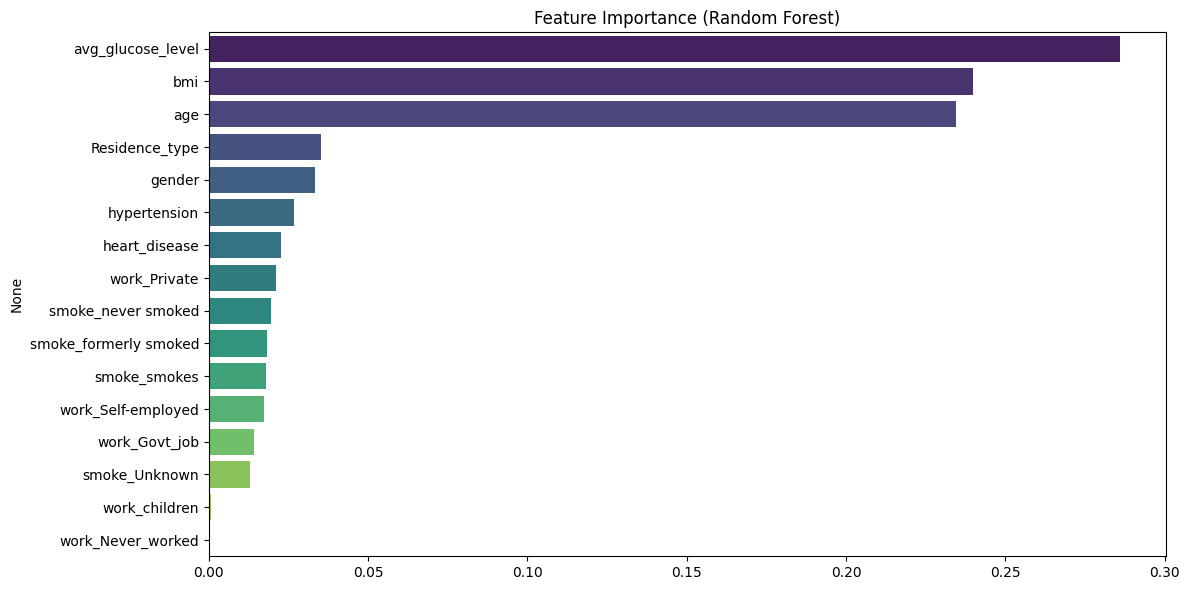

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

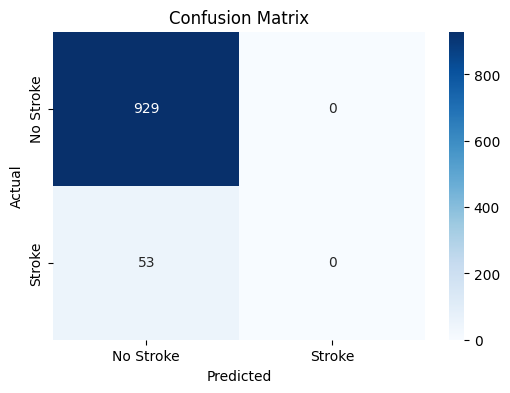

In [36]:
# 📊 Confusion Matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
import pickle

# Save model
with open("stroke_prediction_model.pkl", "wb") as file:
    pickle.dump(model, file)

# Optionally, save scaler too if needed for real-world input scaling
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

